In [2]:
import kagglehub as kh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

### Load Dataset

In [3]:
# Download latest version
path = kh.dataset_download("harrywang/wine-dataset-for-clustering")

print("Path:", path)

Path: /home/codespace/.cache/kagglehub/datasets/harrywang/wine-dataset-for-clustering/versions/1


In [4]:
# List files in the specified directory
!ls /home/codespace/.cache/kagglehub/datasets/harrywang/wine-dataset-for-clustering/versions/1/

wine-clustering.csv


In [24]:
# Load dataset into a DataFrame
df = pd.read_csv('/home/codespace/.cache/kagglehub/datasets/harrywang/wine-dataset-for-clustering/versions/1/wine-clustering.csv')

# Display the first few rows
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Data Pre-processing

In [26]:
# Check missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


In [27]:
# Check duplicates
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


In [28]:
# Check data types
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object


In [ ]:
# Check outliers
from scipy.stats import zscore
z_scores = np.abs(zscore(df))
outliers = (z_scores > 3).sum(axis=1)
print("\nNumber of outliers in each row:")
print(outliers)


Number of outliers in each row:
0      0
1      0
2      0
3      0
4      0
      ..
173    0
174    0
175    0
176    0
177    0
Length: 178, dtype: int64


In [ ]:
# Standardise data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

### Clustering

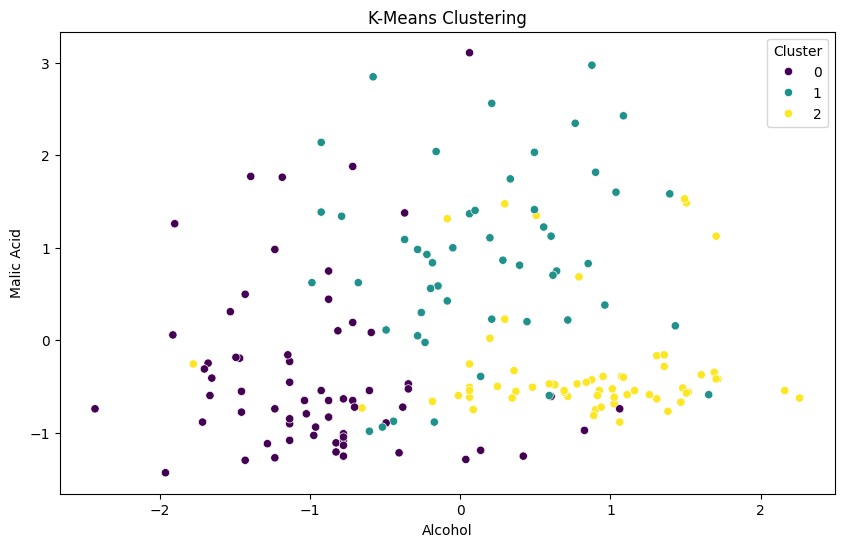

Silhouette Score: 0.2848589191898987


In [ ]:
# k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# visualise the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.show()

# eval silhouette score
score = silhouette_score(df_scaled, df['Cluster'])
print(f'Silhouette Score: {score}')


- this test uses the first two principal components (basically the first two features in the df) 
- in context to the dataset the clusters are representing underlying cultivars 
- c0 wines have lower alcohol and medium levels of malic acid
- c1 more dispersed moderate alcohol and medium levels of malic acid
- c2 higher alcohol and lower malic acid

Concluding these features alone arent enough to differentiate different wine cultivs -add more features

Silhouette Score: 0.2848589191898987


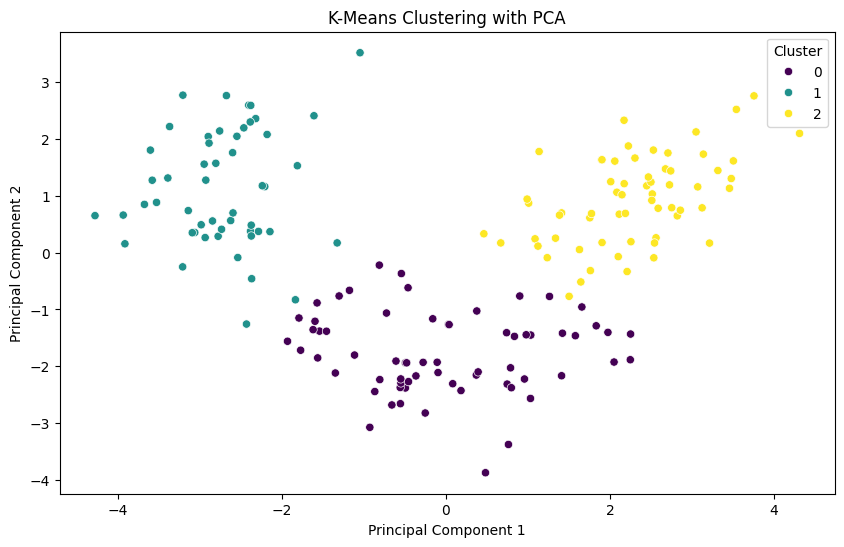

In [42]:
# k-means for entire dataset
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# eval silhouette score
score = silhouette_score(df_scaled, df['Cluster'])
print(f'Silhouette Score: {score}')

# PCA to reduce dimensions to 2 for visual
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# visualising clusters using the two PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

- more distinct clusters
- more features has improved clustering seperation
- using PCA reducing dimensionality to 2 components to visualise in plot
    - PCA 1 captures most variance
    - PCA 2 captures second most variance orthogonal to the first as each PC is perpendicluar to the others (to capture different aspects of data variance)
        - PCA is a linear trasnformation which means each variable is * by a constant coefficient then summed. Transforming is calculating the eigenvectors and eigenvalues of the covariance matrix.
            - Eigenvalues are the directions of magnitude of variance
            - Eigenvectors are the directions of maximum variance
- although clustering looks good, silhouette score suggests misclaffication/overlap as it is very low.

Concluding 
- no. of clusters might not be optimal
- maybe use elbow method


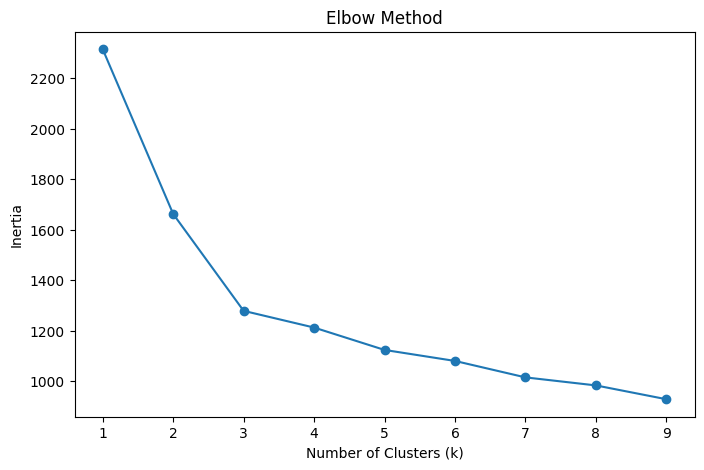

In [45]:
# calculate inertia for different values of k
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()


elbow plot suggests k=3 is optimal 